<a href="https://colab.research.google.com/github/BRBC/PIM_Proiect/blob/main/Laborator5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import os
import scipy.signal as sig
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict

In [47]:

def zplane(z, p, filename=None):
    # Plot the complex z-plane given zeros and poles.
    # get a figure/plot
    ax = plt.subplot(2, 2, 1)
    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9,color='none', alpha=0.5, markeredgecolor=poles[0].get_color(), )
    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r,-r, r])
    #    ticks = [-1, -.5, .5, 1]
    #    plt.xticks(ticks)
    #    plt.yticks(ticks)
    # Finding duplicates by same pixel coordinates (hacky for now):
    poles_xy = ax.transData.transform(np.vstack(poles[0].get_data()).T)
    zeros_xy = ax.transData.transform(np.vstack(zeros[0].get_data()).T)    
    # dict keys should be ints for matching, but coords should be floats for 
    # keeping location of text accurate while zooming
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in poles_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y,r' ${}^{' + str(value) + '}$',fontsize=13,)
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in zeros_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, r' ${}^{' + str(value) +'}$',fontsize=13,)
    
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
        print('Pole-zero plot saved to ' + str(filename))

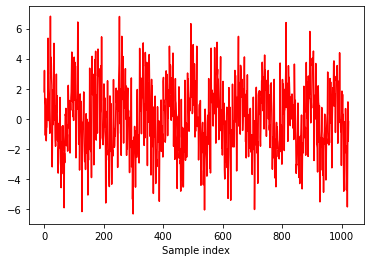

In [17]:
signal = np.loadtxt("test.txt")
length = len(signal)
x = np.linspace(0,length-1,length)
# original_array = signal[0]
plt.plot(x, signal, 'r') #x - dimensiunea fisierului, trebuie sa o determinați
plt.xlabel('Sample index')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


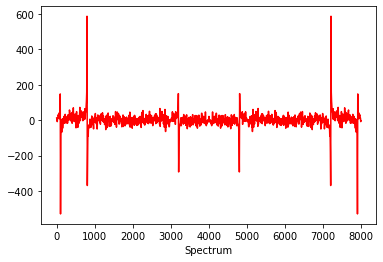

In [52]:
spectrum = np.fft.fft(signal)
fs = 8000
k = fs/length
xf = np.arange(0,fs,k)
plt.plot(xf[0:length], spectrum, 'r') 
plt.xlabel('Spectrum')
plt.show()

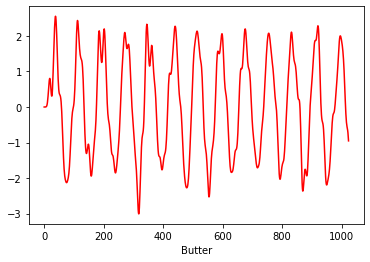

In [55]:
fs=8000
sos = sig.butter(10,512,'lowpass',fs = fs,output='sos')
filtered = sig.sosfilt(sos, signal)
plt.plot(x, filtered, 'r') 
plt.xlabel('Butter')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


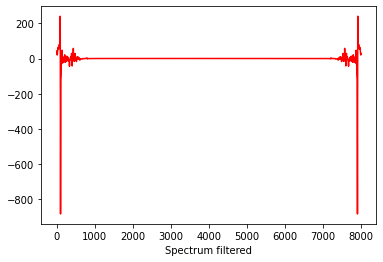

In [56]:
spectrum_filtered = np.fft.fft(filtered)
plt.plot(xf[0:length], spectrum_filtered, 'r') 
plt.xlabel('Spectrum filtered')
plt.show()

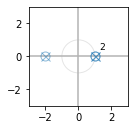

In [50]:
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0 
b, a = sig.iirnotch(f0, Q, fs)
zplane(a,b)

https://wetransfer.com/downloads/3a1e456a337827f758f226e0bbb33a4a20221103153606/ea5637